In [1]:
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [50]:
import pandas as pd

In [51]:
data=pd.read_csv('/content/Social_Network_Ads.csv')
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [52]:
X_data=data.drop(columns='Purchased')
Y_data=data['Purchased']

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit and transform in one step
X_data = scaler.fit_transform(X_data)

#KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model = KNeighborsClassifier(n_neighbors=2)
kf = KFold(n_splits=5)
model.fit(X_data, Y_data)

scores = cross_val_score(model, X_data, Y_data, scoring='accuracy', cv=kf, n_jobs=-1)
print(scores)
meanknn=sum(scores)/5
print(meanknn)

[0.875  0.925  0.8625 0.7875 0.7375]
0.8375


#logistic

In [60]:
from sklearn.linear_model import LogisticRegression
logis=LogisticRegression()
logis.fit(X_data,Y_data)
scores_lr=cross_val_score(logis,X_data,Y_data, scoring='accuracy', cv=kf, n_jobs=-1)
print(scores_lr)
meanlogis=sum(scores_lr)/5
print(meanlogis)

[0.7875 0.9125 0.825  0.8375 0.75  ]
0.8225


#Random Forest

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2)

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(criterion='entropy')   
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [64]:
RandomForestClassifier(criterion='entropy')

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
y_predict = rf_clf.predict(X_test)

In [68]:
scores_lr=cross_val_score(rf_clf,X_data,Y_data, scoring='accuracy', cv=kf, n_jobs=-1)
print(scores_lr)
meanrandomforest=sum(scores_lr)/5
print(meanrandomforest)

[0.9125 0.95   0.825  0.85   0.9   ]
0.8875


#Decision Tree

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.20)

In [74]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [75]:
y_pred = classifier.predict(X_test)

In [76]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[47  5]
 [ 9 19]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        52
           1       0.79      0.68      0.73        28

    accuracy                           0.82        80
   macro avg       0.82      0.79      0.80        80
weighted avg       0.82      0.82      0.82        80

0.825


In [79]:
scores_lr=cross_val_score(classifier,X_data,Y_data, scoring='accuracy', cv=kf, n_jobs=-1)
print(scores_lr)
meandecisiontree=sum(scores_lr)/5
print(meandecisiontree)

[0.875  0.95   0.825  0.8    0.8375]
0.8575000000000002


#Naive Bayesian

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=1)
  
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 85.0


In [86]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
scores_lr=cross_val_score(gnb,X_data,Y_data, scoring='accuracy', cv=kf, n_jobs=-1)
print(scores_lr)
meannaivebayesian=sum(scores_lr)/5
print(meannaivebayesian)

[0.9    0.9375 0.825  0.825  0.8   ]
0.8574999999999999


#SVM

In [87]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2,random_state=109)

In [88]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [89]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8375


In [90]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
scores_lr=cross_val_score(clf,X_data,Y_data, scoring='accuracy', cv=kf, n_jobs=-1)
print(scores_lr)
meansvm=sum(scores_lr)/5
print(meansvm)

[0.7875 0.9125 0.825  0.8375 0.7375]
0.82


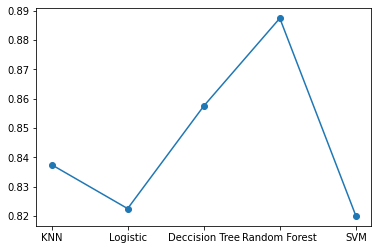

In [96]:
import sys
import matplotlib
matplotlib.use('Agg')

import matplotlib.pyplot as plt
import numpy as np

x = np.array(["KNN", "Logistic", "Deccision Tree","Random Forest", "SVM"])
y = np.array([meanknn, meanlogis, meandecisiontree, meanrandomforest,meansvm])


plt.plot(x,y, marker = 'o')
plt.show()

